# Customer Churn Prediction 

In [1]:
# Include necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from xgboost import XGBClassifier

### Loading Data

In [2]:
# Load the dataset
data = pd.read_excel('customer_churn_large_dataset.xlsx')

In [3]:
print(data.head())

   CustomerID        Name   Age  Gender     Location  \
0         1.0  Customer_1  63.0    Male  Los Angeles   
1         2.0  Customer_2  62.0  Female     New York   
2         3.0  Customer_3  24.0  Female  Los Angeles   
3         4.0  Customer_4  36.0  Female        Miami   
4         5.0  Customer_5  46.0  Female        Miami   

   Subscription_Length_Months  Monthly_Bill  Total_Usage_GB  Churn  
0                        17.0         73.36           236.0    0.0  
1                         1.0         48.76           172.0    0.0  
2                         5.0         85.47           460.0    0.0  
3                         3.0         97.94           297.0    1.0  
4                        19.0         58.14           266.0    0.0  


### Exploring the dataset

In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  float64
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  float64
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  float64
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  float64
 8   Churn                       100000 non-null  float64
dtypes: float64(6), object(3)
memory usage: 6.9+ MB
None


### Checking for missing values

In [5]:
print(data.isnull().sum())

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64


### Exploring data statistics

In [6]:
print(data.describe())

          CustomerID            Age  Subscription_Length_Months  \
count  100000.000000  100000.000000               100000.000000   
mean    50000.500000      44.027020                   12.490100   
std     28867.657797      15.280283                    6.926461   
min         1.000000      18.000000                    1.000000   
25%     25000.750000      31.000000                    6.000000   
50%     50000.500000      44.000000                   12.000000   
75%     75000.250000      57.000000                   19.000000   
max    100000.000000      70.000000                   24.000000   

        Monthly_Bill  Total_Usage_GB          Churn  
count  100000.000000   100000.000000  100000.000000  
mean       65.053197      274.393650       0.497790  
std        20.230696      130.463063       0.499998  
min        30.000000       50.000000       0.000000  
25%        47.540000      161.000000       0.000000  
50%        65.010000      274.000000       0.000000  
75%        82.6400

### Feature Engineering

In [7]:
# Create new feature: Usage_per_Month
data['Usage_per_Month'] = data['Total_Usage_GB'] / data['Subscription_Length_Months']

### Data Analysis

0.0    50221
1.0    49779
Name: Churn, dtype: int64


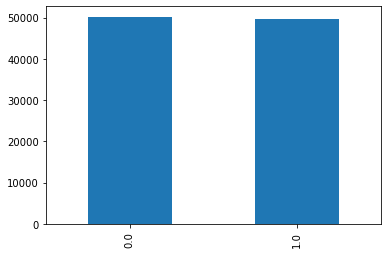

In [8]:
# Counting Values in Churn column
print(data.Churn.value_counts())
p=data.Churn.value_counts().plot(kind="bar")

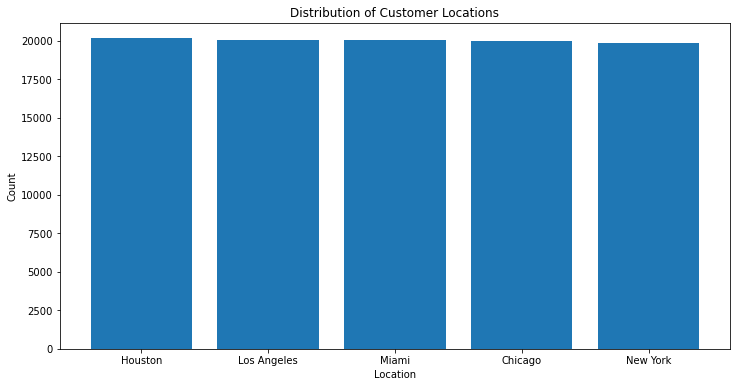

In [9]:
# Extracting 'Location' column from the dataset
locations = data['Location']

# Counting the occurrences of each location
location_counts = locations.value_counts()

# Plotting the histogram
plt.figure(figsize=(12, 6))
plt.bar(location_counts.index, location_counts.values)
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Distribution of Customer Locations')
plt.show()

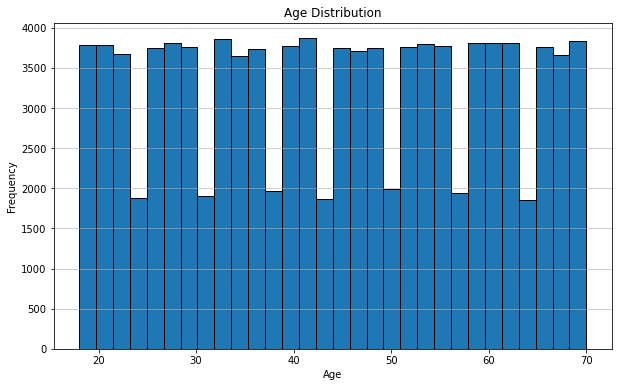

In [10]:
# Extracting 'Age' column from the dataset
ages = data['Age']

# Creating a histogram
plt.figure(figsize=(10, 6))
plt.hist(ages, bins= 30, edgecolor='k')  # We can adjust the number of bins for granularity
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.grid(axis='y', alpha=0.75)
plt.show()

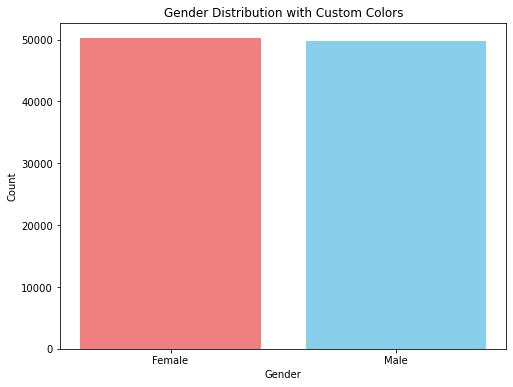

Female    50216
Male      49784
Name: Gender, dtype: int64

In [11]:
# Extracting 'Gender' column from the dataset
genders = data['Gender']

# Counting the occurrences of each gender
gender_counts = genders.value_counts()

# Defining colors for each gender
colors = {'Male': 'skyblue', 'Female': 'lightcoral'}

# Creating a bar chart with custom colors
plt.figure(figsize=(8, 6))
for gender, count in gender_counts.items():
    plt.bar(gender, count, color=colors.get(gender, 'gray'))  # Use 'gray' as the default color
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution with Custom Colors')
plt.show()

gender_counts

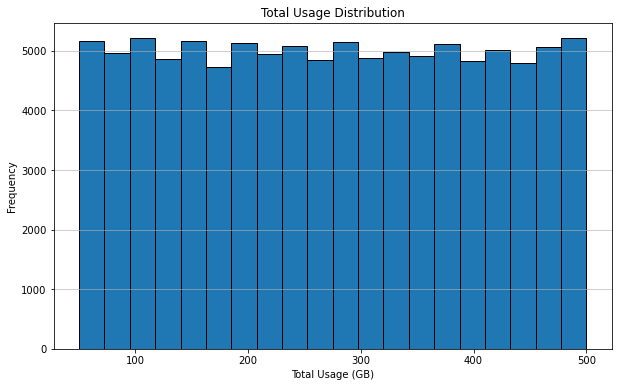

In [12]:
# Extracting 'Total_Usage_GB' column from the dataset
usage = data['Total_Usage_GB']

# Creating a histogram
plt.figure(figsize=(10, 6))
plt.hist(usage, bins=20, edgecolor='k')  # We can adjust the number of bins for granularity
plt.xlabel('Total Usage (GB)')
plt.ylabel('Frequency')
plt.title('Total Usage Distribution')
plt.grid(axis='y', alpha=0.75)
plt.show()

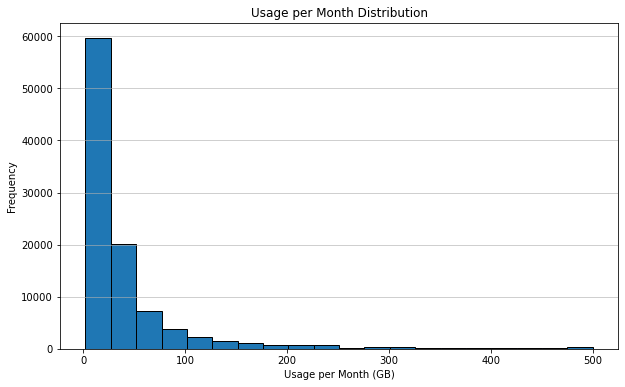

In [13]:
# Extracting 'Usage_per_Month' column
usage_per_month = data['Usage_per_Month']

# Creating a histogram
plt.figure(figsize=(10, 6))
plt.hist(usage_per_month, bins=20, edgecolor='k') 
plt.xlabel('Usage per Month (GB)')
plt.ylabel('Frequency')
plt.title('Usage per Month Distribution')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [14]:
print(data['Location'].unique())

['Los Angeles' 'New York' 'Miami' 'Chicago' 'Houston']


In [15]:
# Changing the values in country column
data['Location'] = data['Location'].replace(['Los Angeles'],'0')
data['Location'] = data['Location'].replace(['New York'],'1')
data['Location'] = data['Location'].replace(['Miami'],'2')
data['Location'] = data['Location'].replace(['Chicago'],'3')
data['Location'] = data['Location'].replace(['Houston'],'4')

# Changing the values in gender column
data['Gender'] = data['Gender'].replace(['Female'],'0')
data['Gender'] = data['Gender'].replace(['Male'],'1')

In [16]:
data.head(20)

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Usage_per_Month
0,1.0,Customer_1,63.0,1,0,17.0,73.36,236.0,0.0,13.882353
1,2.0,Customer_2,62.0,0,1,1.0,48.76,172.0,0.0,172.000000
2,3.0,Customer_3,24.0,0,0,5.0,85.47,460.0,0.0,92.000000
3,4.0,Customer_4,36.0,0,2,3.0,97.94,297.0,1.0,99.000000
4,5.0,Customer_5,46.0,0,2,19.0,58.14,266.0,0.0,14.000000
5,6.0,Customer_6,67.0,1,1,15.0,82.65,456.0,1.0,30.400000
6,7.0,Customer_7,30.0,0,3,3.0,73.79,269.0,0.0,89.666667
7,8.0,Customer_8,67.0,0,2,1.0,97.70,396.0,1.0,396.000000
8,9.0,Customer_9,20.0,0,2,10.0,42.45,150.0,1.0,15.000000
9,10.0,Customer_10,53.0,0,0,12.0,64.49,383.0,1.0,31.916667


In [17]:
#converting object data types column to integer
data['Location'] = pd.to_numeric(data['Location'])
data['Gender'] = pd.to_numeric(data['Gender'])
data.dtypes

CustomerID                    float64
Name                           object
Age                           float64
Gender                          int64
Location                        int64
Subscription_Length_Months    float64
Monthly_Bill                  float64
Total_Usage_GB                float64
Churn                         float64
Usage_per_Month               float64
dtype: object

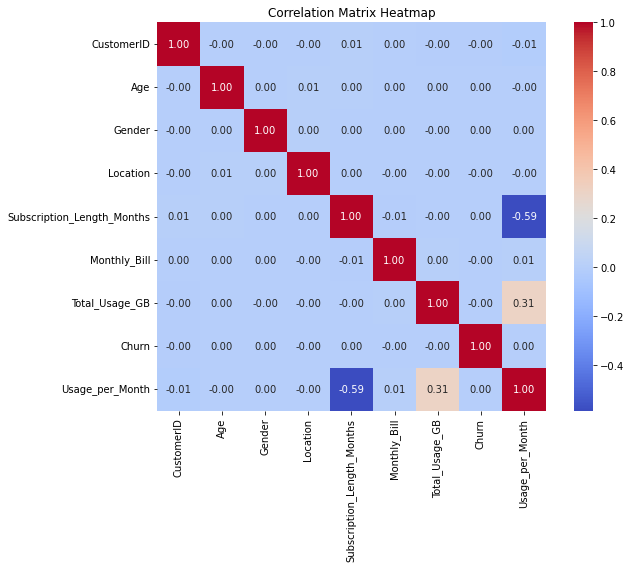

In [18]:
# Calculating the correlation matrix
correlation_matrix = data.corr()

# Creating a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

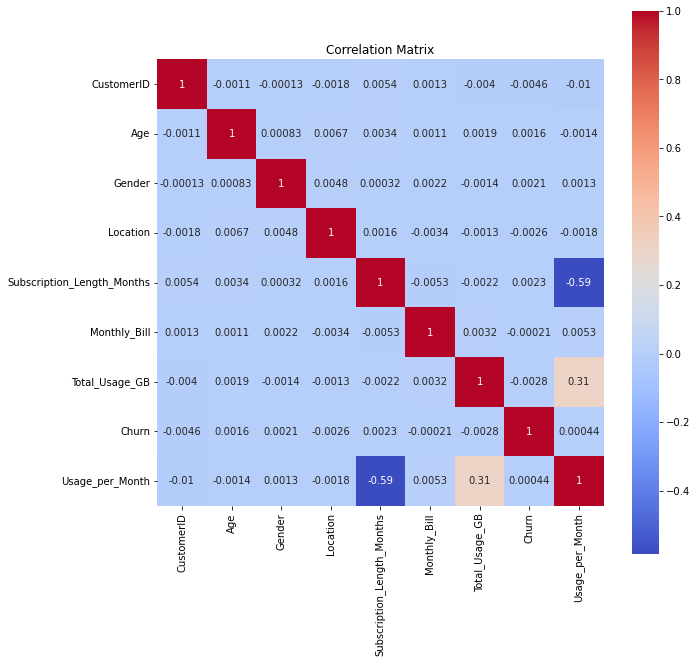

,CustomerID,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Usage_per_Month
CustomerID,1.000000,-0.001085,-0.000131,-0.001807,0.005444,0.001265,-0.004025,-0.004586,-0.010070
Age,-0.001085,1.000000,0.000832,0.006660,0.003382,0.001110,0.001927,0.001559,-0.001419
Gender,-0.000131,0.000832,1.000000,0.004848,0.000320,0.002239,-0.001385,0.002121,0.001347
Location,-0.001807,0.006660,0.004848,1.000000,0.001574,-0.003367,-0.001251,-0.002594,-0.001819
Subscription_Length_Months,0.005444,0.003382,0.000320,0.001574,1.000000,-0.005294,-0.002203,0.002328,-0.586065
Monthly_Bill,0.001265,0.001110,0.002239,-0.003367,-0.005294,1.000000,0.003187,-0.000211,0.005304
Total_Usage_GB,-0.004025,0.001927,-0.001385,-0.001251,-0.002203,0.003187,1.000000,-0.002842,0.311101
Churn,-0.004586,0.001559,0.002121,-0.002594,0.002328,-0.000211,-0.002842,1.000000,0.000443
Usage_per_Month,-0.010070,-0.001419,0.001347,-0.001819,-0.586065,0.005304,0.311101,0.000443,1.000000


In [19]:
# Generating a correlation matrix for numerical columns
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(10, 10))
sns.heatmap(data[numeric_cols].corr(), annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

corr_matrix_new = data[numeric_cols].corr()
corr_matrix_new

In [20]:
# Standardizing numerical features
scaler = StandardScaler()
data[['Monthly_Bill', 'Total_Usage_GB', 'Subscription_Length_Months', 'Usage_per_Month']] = scaler.fit_transform(
    data[['Monthly_Bill', 'Total_Usage_GB', 'Subscription_Length_Months', 'Usage_per_Month']])

In [21]:
# Removing the 'Name' column
df2 = data.drop('Name', axis=1)
df2.head()

,CustomerID,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Usage_per_Month
0,1.0,63.0,1,0,0.651115,0.410606,-0.294289,0.0,-0.447926
1,2.0,62.0,0,1,-1.658879,-0.805374,-0.784852,0.0,1.955583
2,3.0,24.0,0,0,-1.081380,1.009204,1.422681,0.0,0.739522
3,4.0,36.0,0,2,-1.370129,1.625597,0.173279,1.0,0.845928
4,5.0,46.0,0,2,0.939864,-0.341720,-0.064338,0.0,-0.446138


In [22]:
# Building the Machine Learning Model
X = df2.drop('Churn', axis=1)
y = df2['Churn']

#Test size 20% and Train size 80%
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=7)

In [23]:
# Printing the shape of training and testing data
print('Training data shape: ', X_train.shape)
print('Testing data shape: ', X_test.shape)

Training data shape:  (80000, 8)
Testing data shape:  (20000, 8)


### Decision Tree

Accuracy Score : 50.029999999999994 %
Classification Report:
               precision    recall  f1-score   support

         0.0       0.50      0.51      0.51      9954
         1.0       0.50      0.49      0.49     10046

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000



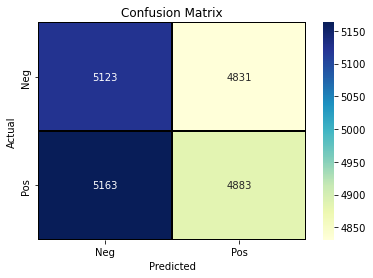

In [24]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred)*100, "%")

# Generating the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Building the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
ax=plt.subplot();
sns.heatmap(cm, annot=True, fmt='d', linewidths=2, linecolor='black', cmap='YlGnBu',ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_ylim(2.0,0)
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Neg','Pos'])
ax.yaxis.set_ticklabels(['Neg','Pos'])
plt.show()

### Random Forest

Accuracy Score : 49.875 %
Classification Report:
               precision    recall  f1-score   support

         0.0       0.50      0.54      0.52      9954
         1.0       0.50      0.46      0.48     10046

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000



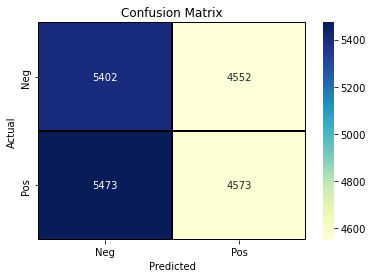

In [25]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred)*100, "%")

# Generating the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Building the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
ax=plt.subplot();
sns.heatmap(cm, annot=True, fmt='d', linewidths=2, linecolor='black', cmap='YlGnBu',ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_ylim(2.0,0)
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Neg','Pos'])
ax.yaxis.set_ticklabels(['Neg','Pos'])
plt.show()

In [26]:
data.dtypes

CustomerID                    float64
Name                           object
Age                           float64
Gender                          int64
Location                        int64
Subscription_Length_Months    float64
Monthly_Bill                  float64
Total_Usage_GB                float64
Churn                         float64
Usage_per_Month               float64
dtype: object

### XGBoost

Accuracy Score : 50.07 %
Classification Report:
               precision    recall  f1-score   support

         0.0       0.50      0.54      0.52      9954
         1.0       0.50      0.46      0.48     10046

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000



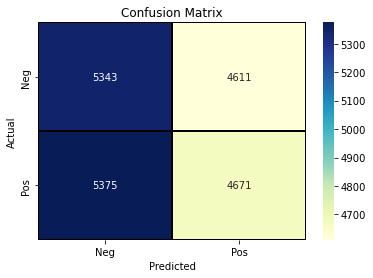

In [27]:
# XGBoost
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred)*100, "%")

# Generate the classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report:\n", report)

# Building confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
ax=plt.subplot();
sns.heatmap(cm, annot=True, fmt='d', linewidths=2, linecolor='black', cmap='YlGnBu',ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_ylim(2.0,0)
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Neg','Pos'])
ax.yaxis.set_ticklabels(['Neg','Pos'])
plt.show()

### Support Vector Machine

In [ ]:
# Support Vector Machine
from sklearn import svm
svm = svm.SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred)*100, "%")

# Generating the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Building the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
ax=plt.subplot();
sns.heatmap(cm, annot=True, fmt='d', linewidths=2, linecolor='black', cmap='YlGnBu',ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_ylim(2.0,0)
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Neg','Pos'])
ax.yaxis.set_ticklabels(['Neg','Pos'])
plt.show()

In [32]:
# Handle missing values (if any)
data.dropna(inplace=True)  # Or impute missing values

# Perform one-hot encoding on the remaining categorical columns
one_hot_encoded = pd.get_dummies(data, sparse=True)

# Continue with your data processing and modeling using one_hot_encoded

one_hot_encoded

,CustomerID,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Usage_per_Month
0,1.0,63.0,1,0,0.651115,0.410606,-0.294289,0.0,-0.447926
1,2.0,62.0,0,1,-1.658879,-0.805374,-0.784852,0.0,1.955583
2,3.0,24.0,0,0,-1.081380,1.009204,1.422681,0.0,0.739522
3,4.0,36.0,0,2,-1.370129,1.625597,0.173279,1.0,0.845928
4,5.0,46.0,0,2,0.939864,-0.341720,-0.064338,0.0,-0.446138
...,...,...,...,...,...,...,...,...,...
99995,99996.0,33.0,1,4,1.517363,-0.490504,-0.370939,1.0,-0.509584
99996,99997.0,62.0,0,1,0.939864,-0.168220,0.587191,0.0,-0.378134
99997,99998.0,64.0,1,3,0.651115,1.535140,-0.179313,1.0,-0.434514
99998,99999.0,51.0,0,1,1.084239,-0.781153,1.223390,1.0,-0.329092


In [33]:
# Building the Machine Learning Model
X = data.drop('Churn', axis=1)
y = data['Churn']

X_train, X_test, y_train, y_test = train_test_split(one_hot_encoded,y, test_size=0.2, random_state=7)

In [34]:
# Printing the shape of training and testing data
print('Training data shape: ', X_train.shape)
print('Testing data shape: ', X_test.shape)

Training data shape:  (80000, 9)
Testing data shape:  (20000, 9)


In [35]:
from sklearn.ensemble import GradientBoostingClassifier

# Create the GradientBoostingClassifier object
gbr = GradientBoostingClassifier()

# Fit the model to the training data
gbr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gbr.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print('Accuracy:', accuracy)


Accuracy: 1.0


Accuracy Score : 100.0 %
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      9954
         1.0       1.00      1.00      1.00     10046

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000



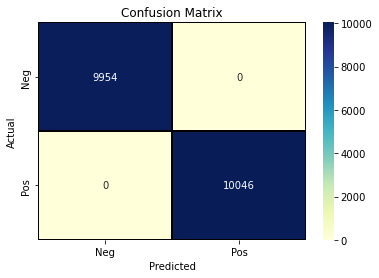

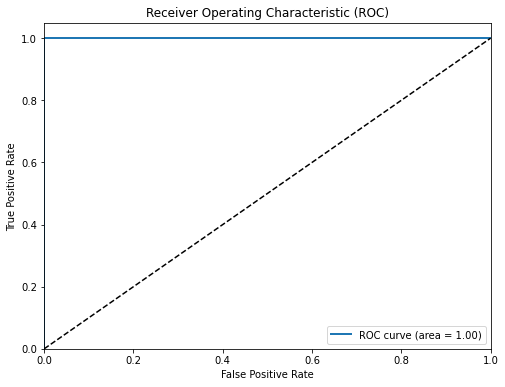

In [36]:
# Decision Tree

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred)*100, "%")

# Generating the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Building the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
ax=plt.subplot();
sns.heatmap(cm, annot=True, fmt='d', linewidths=2, linecolor='black', cmap='YlGnBu',ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_ylim(2.0,0)
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Neg','Pos'])
ax.yaxis.set_ticklabels(['Neg','Pos'])
plt.show()

from sklearn.metrics import roc_curve, roc_auc_score

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, dtree.predict_proba(X_test)[:, 1])

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, dtree.predict_proba(X_test)[:, 1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linewidth=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

Accuracy Score : 100.0 %
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      9954
         1.0       1.00      1.00      1.00     10046

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000



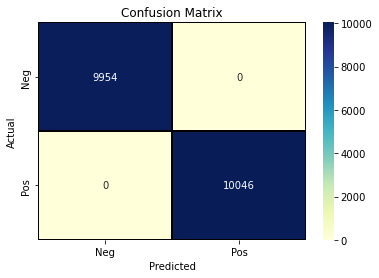

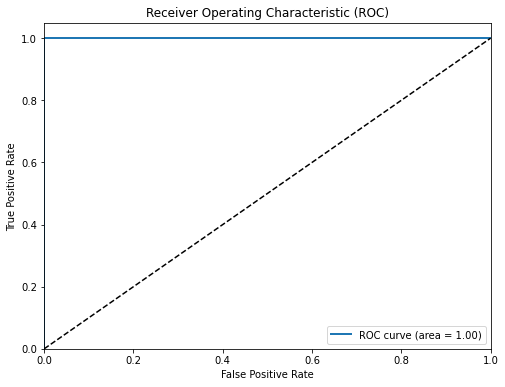

In [37]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred)*100, "%")

# Generating the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Building the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
ax=plt.subplot();
sns.heatmap(cm, annot=True, fmt='d', linewidths=2, linecolor='black', cmap='YlGnBu',ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_ylim(2.0,0)
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Neg','Pos'])
ax.yaxis.set_ticklabels(['Neg','Pos'])
plt.show()

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, dtree.predict_proba(X_test)[:, 1])

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, dtree.predict_proba(X_test)[:, 1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linewidth=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()